<a href="https://colab.research.google.com/github/mitrasurabhi/NLP-PROJECTS/blob/main/TFIDF_Identification_of_Quora_question_pairs_with_the_same_intent_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Identification of duplicate quora question pairs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud
import tensorflow as tf
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Reading data and basic stats

In [ ]:
dataset = pd.read_csv('https://cdn.extras.talentsprint.com/ADSMI/Datasets/quora_question_pairs.zip')
dataset

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
dataset.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [ ]:
dataset.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
dataset.duplicated().sum()

0

<Axes: xlabel='is_duplicate'>

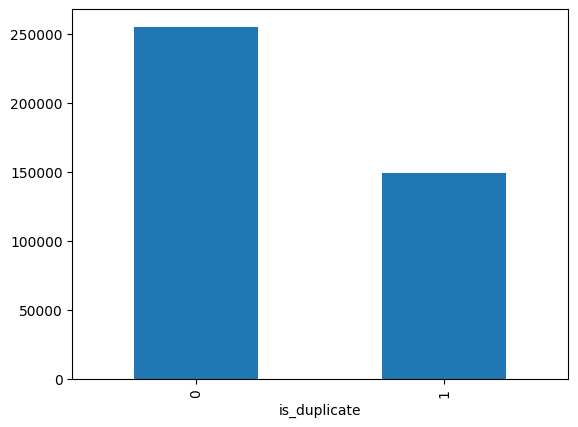

In [ ]:
dataset.groupby("is_duplicate")['id'].count().plot.bar()

In [ ]:
dataset.drop(['id','qid1','qid2'],axis=1,inplace=True)

In [ ]:
dataset.dropna(inplace= True)

In [ ]:
dataset.isnull().sum()

question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
dataset

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...
404285,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,What is one coin?,What's this coin?,0
404288,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


#Distribution of data points among output classes
* Number of duplicate (smilar) and non-duplicate (non similar) questions

In [ ]:
print('Question pairs are not-duplicate (is_duplicate = 0):\n{}%'.format(100 - round(dataset['is_duplicate'].mean()*100, 2)))
print('Question pairs are duplicate (is_duplicate = 1):\n{}%'.format(round(dataset['is_duplicate'].mean()*100, 2)))

Question pairs are not-duplicate (is_duplicate = 0):
63.08%
Question pairs are duplicate (is_duplicate = 1):
36.92%


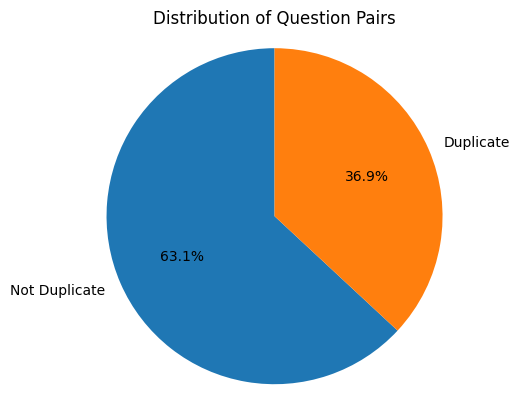

In [ ]:
not_duplicate_percent = 100 - round(dataset['is_duplicate'].mean() * 100, 2)
duplicate_percent = round(dataset['is_duplicate'].mean() * 100, 2)
labels = ['Not Duplicate', 'Duplicate']
sizes = [not_duplicate_percent, duplicate_percent]

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Aspect ratio ensures a circular pie chart
plt.axis('equal')

# Title of the chart
plt.title('Distribution of Question Pairs')

# Display the pie chart
plt.show()


# Wordcloud

In [ ]:
duplicate_pairs = dataset.loc[dataset['is_duplicate'] == 1, ['question1', 'question2']]
non_duplicate_pairs = dataset.loc[dataset['is_duplicate'] == 0, ['question1', 'question2']]

In [ ]:
duplicate_question_pairs = duplicate_pairs['question1'] + ' ' + duplicate_pairs['question2']
non_duplicate_question_pairs = non_duplicate_pairs['question1'] + ' ' + non_duplicate_pairs['question2']

In [ ]:
duplicate_wordcloud = WordCloud().generate(' '.join(duplicate_question_pairs))
non_duplicate_wordcloud = WordCloud().generate(' '.join(non_duplicate_question_pairs))

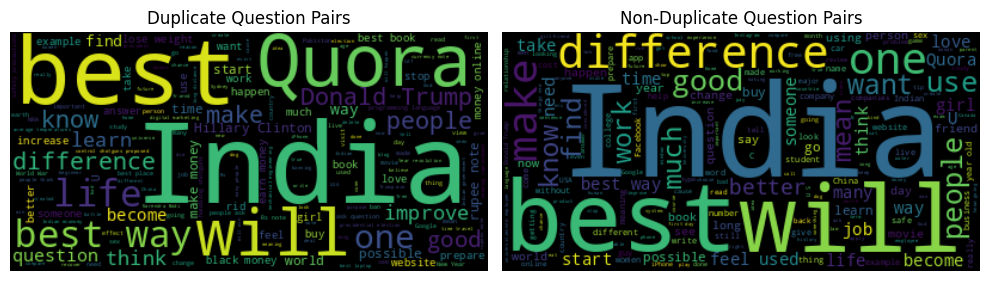

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(duplicate_wordcloud, interpolation='bilinear')
axes[0].set_title('Duplicate Question Pairs')
axes[0].axis('off')

axes[1].imshow(non_duplicate_wordcloud, interpolation='bilinear')
axes[1].set_title('Non-Duplicate Question Pairs')
axes[1].axis('off')

plt.tight_layout()
plt.show()


#Cleaning

In [ ]:
CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

In [ ]:
def cleaning_text(text):
    text = str(text).lower()
#text = re.sub(r'\b(\w+)[^\w\s]*\b', r'\1', text)
 #remove punctuations
    reg = re.compile('([^0-9A-Za-z t])|(\w+://\S+)|([.\/@#*<>?])')
    text=re.sub(reg,' ',text)
    # expanding the words in using contraction map
    new_text=''
    for word in text.split():
        if word in CONTRACTION_MAP.keys():
            new_text=new_text+CONTRACTION_MAP[word]
        else:
            new_text=new_text+word
        new_text=new_text+' '
    text=new_text
    #remove stop words
    stop_words=set(stopwords.words('english'))
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

    return text

In [ ]:
quora = dataset.copy()

In [ ]:
quora.question1=dataset.question1.apply(cleaning_text)

In [ ]:
quora.question2=dataset.question2.apply(cleaning_text)

In [ ]:
quora

,question1,question2,is_duplicate
0,step step guide invest share market india,step step guide invest share market,0
1,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...,0
2,increase speed internet connection using vpn,internet speed increased hacking dns,0
3,mentally lonely solve,find remainder math 23 24 math divided 24 23,0
4,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0
...,...,...,...
404285,many keywords racket programming language late...,many keywords perl programming language latest...,0
404286,believe life death,true life death,1
404287,one coin,coin,0
404288,approx annual cost living studying uic chicago...,little hairfall problem want use hair styling ...,0


In [ ]:
questions_data = quora[['question1','question2']]
questions_data.head()

,question1,question2
0,step step guide invest share market india,step step guide invest share market
1,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...
2,increase speed internet connection using vpn,internet speed increased hacking dns
3,mentally lonely solve,find remainder math 23 24 math divided 24 23
4,one dissolve water quikly sugar salt methane c...,fish would survive salt water


#TF-IDF with random forest

In [ ]:
questions = list(questions_data['question1']) + list(questions_data['question2'])

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
len(questions)

808574

In [ ]:
questions_fit = tfidf.fit_transform(questions)

In [ ]:
questions_fit.shape

(808574, 77630)

In [ ]:
ques1_arr = questions_fit[:(questions_fit.shape[0]//2),]
ques2_arr = questions_fit[(questions_fit.shape[0]//2):,]

In [ ]:
ques1_arr.shape

(404287, 77630)

In [ ]:
ques2_arr

<404287x77630 sparse matrix of type '<class 'numpy.float64'>'
	with 2151371 stored elements in Compressed Sparse Row format>

In [ ]:
ques_arr = hstack((ques1_arr, ques2_arr))

In [ ]:
ques_arr

<404287x155260 sparse matrix of type '<class 'numpy.float64'>'
	with 4285760 stored elements in Compressed Sparse Row format>

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(ques_arr,quora['is_duplicate'],test_size=0.2,random_state=1)

In [ ]:
X_train.shape

(323429, 155260)

In [ ]:
X_test

In [ ]:
randomForest = RandomForestClassifier()
randomForest.fit(X_train,y_train)

KeyboardInterrupt: ignored

Random forest confusion matrix, accuracy score and classification report

In [ ]:
y_pred = randomForest.predict(X_test)

print("RandomForest confusion matrix")
randomForestModel_confusionMatrix = confusion_matrix(y_test, y_pred)
print(randomForestModel_confusionMatrix)

print( 'test_accuracy = ', accuracy_score(y_test, y_pred))

print("\nClassification report for random forest model")
print(classification_report(y_test, y_pred))
print("Random forest Accuracy score : ",accuracy_score(y_test,y_pred))